## <p style="font-family: Times New Roman; font-size:1.4em;color:black;"> Sistemas de Recomendação </p>
<p style="font-family: Times New Roman; font-size:1.2em;color:blue;"> Objetivo: Aprender e aplicar o Algoritmo de Sistemas de Recomendação, que consistem em sistemas recomendar elementos de características semelhantes aos elementos ja escolhidos pela preferência de um usuário. Por exemplo, para um Dataset de filmes, a partir da escolha do usuário, o algoritmo reune os elementos (filmes) presentes no Dataset que apresentam características semelhantes ao escolhido pelo usuário e os recomenda para o mesmo. </p>

In [1]:
# OBS: Comando para Instalar a função surprise!!!!
# conda install -c conda-surge scikit-surprise
# pip install scikit-surprise

# Comando para importar a Biblioteca Suprise:
import surprise
# Comandos para importar as outras funções:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Comando para carregar o dataset:
dataset = pd.read_csv('C:/Users/amdua/OneDrive/Documentos/ArquivosPython/ratings.txt', sep = " ", 
names = ['id_usuario', 'id_filme', 'rating'])

In [3]:
dataset.head(20)

id_usuario  id_filme  rating
0            1         1     2.0
1            1         2     4.0
2            1         3     3.5
3            1         4     3.0
4            1         5     4.0
5            1         6     3.5
6            1         7     3.5
7            1         8     3.0
8            1         9     2.5
9            1        10     4.0
10           1        11     4.0
11           1        12     4.0
12           2        13     2.0
13           3        14     0.5
14           3        15     1.0
15           3        16     4.0
16           3        17     3.0
17           3        18     4.0
18           3        19     4.0
19           3        20     2.5

In [4]:
# Comandos para mostrar a quantidade total de cada elemento em forma de lista:
filmes = len(dataset['id_filme'].unique())
usuarios = len(dataset['id_usuario'].unique())
amostras = dataset.shape[0]
print('Total de filmes:', filmes)
print('Total de usuários:', usuarios)
print('Total de amostras:', amostras)

Total de filmes: 2071
Total de usuários: 1508
Total de amostras: 35497


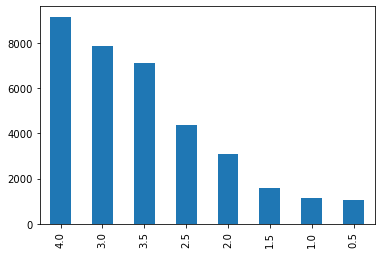

In [5]:
# Comando para mostrar a quantidde de vezes que cada taxa/nota que foi dada para os filmes:
dataset['rating'].value_counts().plot(kind='bar')
plt.show()

In [6]:
# Comando para mostrar a quantidde mínima e máxima dos ratings:
menor_rating = dataset['rating'].min()
maior_rating = dataset['rating'].max()
print ('Variação de rating: {0} a {1}'.format(menor_rating, maior_rating))

Variação de rating: 0.5 a 4.0


In [7]:
# Comando para redefinir o range (a faixa) de ratings, pois o range padrão é de 1.0 a 5.0:
reader = surprise.Reader(rating_scale = (0.5, 4.0)) # pode carregar um dataset built-in também!!
dataset_surprise = surprise.Dataset.load_from_df(dataset, reader)

In [8]:
# Comando para escolher o algoritmo e treinar o modelo:
dataset_preenchido = dataset_surprise.build_full_trainset() # comando build_full_trainset serve para criar o conjunto de treino!
algoritmo = surprise.SVDpp(n_factors=20) # SVD++
algoritmo.fit(dataset_preenchido)

In [9]:
# Comando para fazer a predição dos dados faltantes:
dataset_missing = dataset_preenchido.build_anti_testset()
previsoes = algoritmo.test(dataset_missing)

In [10]:
previsoes[0]

Prediction(uid=1, iid=13, r_ui=3.0028030537791928, est=3.3964297386838322, details={'was_impossible': False})

In [11]:
previsoes

[Prediction(uid=1, iid=13, r_ui=3.0028030537791928, est=3.3964297386838322, details={'was_impossible': False}),
 Prediction(uid=1, iid=14, r_ui=3.0028030537791928, est=2.87642419103655, details={'was_impossible': False}),
 Prediction(uid=1, iid=15, r_ui=3.0028030537791928, est=3.064581076661643, details={'was_impossible': False}),
 Prediction(uid=1, iid=16, r_ui=3.0028030537791928, est=3.5027072410804565, details={'was_impossible': False}),
 Prediction(uid=1, iid=17, r_ui=3.0028030537791928, est=3.3958132415531717, details={'was_impossible': False}),
 Prediction(uid=1, iid=18, r_ui=3.0028030537791928, est=3.4807988531673035, details={'was_impossible': False}),
 Prediction(uid=1, iid=19, r_ui=3.0028030537791928, est=3.349736525365716, details={'was_impossible': False}),
 Prediction(uid=1, iid=20, r_ui=3.0028030537791928, est=3.230161943164215, details={'was_impossible': False}),
 Prediction(uid=1, iid=21, r_ui=3.0028030537791928, est=3.015524396432208, details={'was_impossible': False})

In [12]:
len(previsoes)

3087574

In [13]:
# Comandos que criam uma função para retornar as Top-N recomendações para cada usuário!!!!
# OBS: Esta função retornará um dicionário onde as chaves são os usuários e os valores são listas de tuplas 
#..(filme, rating_previsto).
from collections import defaultdict

def obtem_top_n(previsoes, n=5): # Comando onde n = a quantidade de recomendações desejadas!!
    top_n = defaultdict(list) # Comando que cria um dicionário onde os valores são listas vazias!!
    for usuario, filme, _, previsao, _ in previsoes: # O comando _ é quando usar quando não estamos interessados neste valor!!
        top_n[usuario].append((filme, previsao)) # Comando que adiciona o par chave:valor ao dicionário criado!!
    for usuario, previsoes_usuario in top_n.items(): # O comando .items() é para iterar o conjunto (chave:valor) do dicionário!!
        previsoes_usuario.sort(key=lambda x:x[1], reverse=True) # Comando que ordena as previsões de rating do maior pro menor!!
        top_n[usuario] = previsoes_usuario[:n] # Comando que salva somente os N primeiros valores
    return top_n

In [14]:
dic = defaultdict(list)

In [15]:
dic[0]

[]

In [16]:
top_5 = obtem_top_n(previsoes, n=5)

In [17]:
top_5

defaultdict(list,
            {1: [(286, 4.0),
              (335, 4.0),
              (805, 4.0),
              (675, 3.9542838648077603),
              (318, 3.930761574901062)],
             2: [(805, 3.6466372601199644),
              (286, 3.577676245172782),
              (335, 3.5673377912013247),
              (675, 3.508114118687561),
              (658, 3.4845529559419965)],
             3: [(286, 4.0),
              (249, 3.957005974252639),
              (250, 3.9339054707844663),
              (1485, 3.910353304028898),
              (5, 3.7784331543915197)],
             4: [(286, 3.46581318697347),
              (335, 3.267589348034647),
              (705, 3.2534334095797592),
              (805, 3.240234970405252),
              (400, 3.2352149654984355)],
             5: [(286, 3.902902211973329),
              (805, 3.8140979573526015),
              (335, 3.7294503172807643),
              (242, 3.6522373801147876),
              (728, 3.6345511507906685)],
        

In [18]:
for usuario, previsoes_usuario in top_5.items():
    print(usuario, [filme for (filme, _) in previsoes_usuario])

1 [286, 335, 805, 675, 318]
2 [805, 286, 335, 675, 658]
3 [286, 249, 250, 1485, 5]
4 [286, 335, 705, 805, 400]
5 [286, 805, 335, 242, 728]
6 [286, 318, 363, 689, 335]
7 [286, 335, 318, 805, 425]
8 [286, 805, 335, 705, 728]
9 [335, 286, 805, 307, 658]
10 [286, 805, 335, 658, 705]
11 [286, 805, 675, 318, 363]
12 [286, 805, 335, 658, 689]
13 [286, 309, 805, 8, 293]
14 [286, 805, 318, 675, 335]
15 [805, 335, 286, 689, 1091]
16 [286, 805, 335, 705, 728]
17 [286, 805, 335, 563, 391]
18 [286, 805, 335, 299, 696]
19 [286, 805, 335, 675, 728]
20 [286, 805, 335, 689, 675]
21 [52, 68, 69, 96, 126]
22 [68, 96, 126, 181, 189]
23 [805, 286, 335, 770, 696]
24 [286, 805, 335, 307, 68]
25 [286, 805, 335, 696, 293]
26 [286, 805, 675, 689, 728]
27 [286, 658, 335, 126, 68]
28 [286, 318, 805, 297, 307]
29 [805, 335, 563, 728, 696]
30 [335, 696, 286, 432, 363]
31 [286, 658, 307, 335, 805]
32 [286, 805, 335, 307, 689]
33 [318, 805, 286, 307, 335]
34 [286, 335, 805, 318, 728]
35 [286, 335, 805, 318, 705]
36 [

1183 [805, 335, 307, 705, 189]
1184 [286, 805, 658, 335, 299]
1185 [286, 805, 675, 335, 689]
1186 [805, 286, 335, 675, 689]
1187 [805, 705, 400, 315, 519]
1188 [286, 805, 675, 335, 398]
1189 [805, 286, 689, 705, 335]
1190 [805, 286, 307, 335, 728]
1191 [805, 286, 335, 363, 299]
1192 [286, 318, 805, 335, 675]
1193 [286, 805, 335, 728, 675]
1194 [286, 335, 705, 805, 400]
1195 [218, 286, 318, 335, 363]
1196 [286, 805, 335, 318, 689]
1197 [286, 805, 675, 689, 318]
1198 [286, 805, 696, 335, 563]
1199 [68, 189, 218, 286, 293]
1200 [286, 335, 446, 563, 689]
1201 [286, 696, 307, 658, 805]
1202 [286, 318, 335, 696, 805]
1203 [11, 13, 18, 24, 43]
1204 [286, 335, 805, 658, 299]
1205 [286, 318, 335, 805, 218]
1206 [318, 805, 286, 335, 307]
1207 [286, 335, 805, 658, 307]
1208 [286, 805, 335, 563, 728]
1209 [286, 335, 805, 728, 218]
1210 [286, 805, 335, 728, 696]
1211 [286, 805, 335, 675, 307]
1212 [689, 218, 335, 705, 318]
1213 [286, 318, 335, 658, 689]
1214 [805, 297, 335, 293, 318]
1215 [286, 335

In [19]:
# Comando para fazer uma previsão somenta para um usuário e filme específico:
previsao_usuario = algoritmo.predict(uid='30', iid='87')
rating = previsao_usuario.est
print(rating)

3.0028030537791928


In [20]:
# Comando para validar o modelo:
from surprise.model_selection import train_test_split
dataset_treino, dataset_teste = train_test_split(dataset_surprise, test_size=0.30)

# Comando para definir o modelo:
algoritmo = surprise.SVDpp(n_factors=20)
algoritmo.fit(dataset_treino)
previsoes_gerais = algoritmo.test(dataset_teste)

In [21]:
previsoes_gerais

[Prediction(uid=61, iid=211, r_ui=2.0, est=2.878000741090934, details={'was_impossible': False}),
 Prediction(uid=347, iid=236, r_ui=3.5, est=4.0, details={'was_impossible': False}),
 Prediction(uid=1104, iid=657, r_ui=3.5, est=3.5727768903632637, details={'was_impossible': False}),
 Prediction(uid=540, iid=8, r_ui=4.0, est=3.5336438661220555, details={'was_impossible': False}),
 Prediction(uid=413, iid=233, r_ui=4.0, est=2.923674668877517, details={'was_impossible': False}),
 Prediction(uid=1254, iid=8, r_ui=3.5, est=3.1266197360412087, details={'was_impossible': False}),
 Prediction(uid=572, iid=13, r_ui=4.0, est=3.3241664189713456, details={'was_impossible': False}),
 Prediction(uid=675, iid=220, r_ui=2.5, est=3.3399054918882216, details={'was_impossible': False}),
 Prediction(uid=554, iid=2, r_ui=2.5, est=3.46366724777671, details={'was_impossible': False}),
 Prediction(uid=772, iid=1, r_ui=3.0, est=3.0077711684132904, details={'was_impossible': False}),
 Prediction(uid=838, iid=25

In [22]:
from surprise import accuracy
accuracy.rmse(previsoes_gerais)

RMSE: 0.8116


0.8115870932853761

In [23]:
# Comandos para ajustar os parâmetros:
param_grid = {'lr_all':[0.007, 0.01, 0.05, 0.001], 'reg_all':[0.02, 0.1, 1.0, 0.005]}
surprise_grid = surprise.model_selection.GridSearchCV(surprise.SVDpp, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
surprise_grid.fit(dataset_surprise)
print(surprise_grid.best_params['rmse'])

{'lr_all': 0.007, 'reg_all': 0.1}


In [24]:
# Comandos para importar o modelo:
from surprise import KNNBasic

# Comandos para construção do modelo:
dataset_preenchido = dataset_surprise.build_full_trainset()
algoritmo = KNNBasic(sim_options={'name':'cosine', 'user_based':False})
# OBS: 'name' é o algoritmo de similaridade, 'user_based'==True é para calcular a similaridade entre os usuários!!
algoritmo.fit(dataset_preenchido)

# Comando para mostrar os K vizinhos mais próximos:
vizinhos = algoritmo.get_neighbors(343, k=10)

# Comando para gerar o resultado:
print('Os 10 fimes vizinhos para o ID escolhido são:')
for filme in vizinhos:
    print(filme)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Os 10 fimes vizinhos para o ID escolhido são:
58
90
102
126
147
159
168
171
193
236
